<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_1xd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [1]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [2]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=32972cf6cb32d2b941855fe1ec95ae36f6c29850baa27970d84877285a386d96
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


### ***Cargar y limpiar base de datos***

In [3]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN


In [4]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [5]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [17]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=20)

Escalar los datos

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [19]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

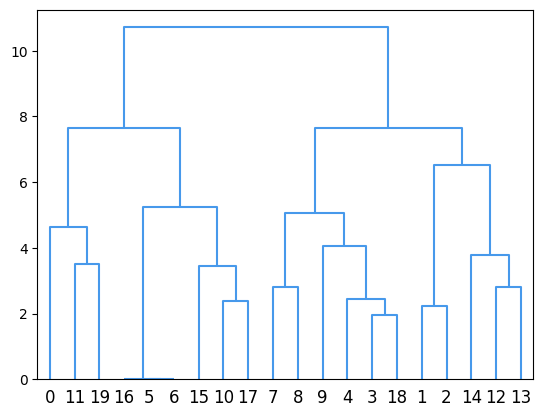

In [20]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [21]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [25]:
import ete3

def convertir_a_Tree(dendo, leaf_names):
    """
    Convierte la salida de scipy.cluster.hierarchy.to_tree a un objeto ete3.Tree.
    """
    tree1 = hierarchy.to_tree(dendo, False)
    newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
    tree = ete3.Tree(newick_tree1)

    return tree


In [26]:

arbol_resultante = convertir_a_Tree(dendo,leaf_names=range(0,20))
print(arbol_resultante.write(format=9))

(((((13,12),14),(2,1)),((((18,3),4),9),(8,7))),((((17,10),15),((6,5),16)),((19,11),0)));


Hallar todos los subárboles del dendrograma

In [27]:
from ete3 import Tree

def asignar_nombres(arbol):

    for i, nodo in enumerate(arbol.traverse()):  #Asigna nombres a los nodos si no tienen uno
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []  #Inicializa una lista para almacenar los subárboles

    for nodo in arbol.traverse():  #Busca nodos descendientes del nodo iterado
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        subarbol = Tree()  #Construye un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

#Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

asignar_nombres(arbol_resultante)
todos_subarboles = obtener_subarboles(arbol_resultante)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles

In [29]:
def obtener_n_subarboles(subarboles, max_n=100):
    """
    Obtiene la lista de n-subárboles para cada valor de n hasta max_n.
    """
    n_subarboles = []

    for n in range(1, max_n + 1):
        n_subarbol = []
        for subarbol in subarboles:
            if len(subarbol) <= n:
                n_subarbol.append(subarbol)
        n_subarboles.append((n, n_subarbol))

    return n_subarboles

In [31]:
n_subs = obtener_n_subarboles(todos_subarboles,20)
for n, subarboles in n_subs:
    print(f"Subárboles con tamaño {n}:")
    for subarbol in subarboles:
        print(obtener_texto(subarbol))
    print("\n")

Subárboles con tamaño 1:
(0);
(14);
(2);
(1);
(9);
(8);
(7);
(15);
(16);
(19);
(11);
(13);
(12);
(4);
(17);
(10);
(6);
(5);
(18);
(3);


Subárboles con tamaño 2:
((2,1));
((8,7));
((19,11));
(0);
((13,12));
(14);
(2);
(1);
(9);
(8);
(7);
((17,10));
(15);
((6,5));
(16);
(19);
(11);
(13);
(12);
((18,3));
(4);
(17);
(10);
(6);
(5);
(18);
(3);


Subárboles con tamaño 3:
(((19,11),0));
(((13,12),14));
((2,1));
((8,7));
(((17,10),15));
(((6,5),16));
((19,11));
(0);
((13,12));
(14);
(2);
(1);
(((18,3),4));
(9);
(8);
(7);
((17,10));
(15);
((6,5));
(16);
(19);
(11);
(13);
(12);
((18,3));
(4);
(17);
(10);
(6);
(5);
(18);
(3);


Subárboles con tamaño 4:
(((19,11),0));
(((13,12),14));
((2,1));
((((18,3),4),9));
((8,7));
(((17,10),15));
(((6,5),16));
((19,11));
(0);
((13,12));
(14);
(2);
(1);
(((18,3),4));
(9);
(8);
(7);
((17,10));
(15);
((6,5));
(16);
(19);
(11);
(13);
(12);
((18,3));
(4);
(17);
(10);
(6);
(5);
(18);
(3);


Subárboles con tamaño 5:
((((13,12),14),(2,1)));
(((19,11),0));
(((13,12),

Determinar los n-subárboles maximales

In [33]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    raiz_subarbol1 = subarbol1.children[0]   #Obtiene el nodo raíz del subarbol1, accediendo al primer hijo del subárbol

    for nodo_subarbol2 in subarbol2.traverse():  #Itera sobre los nodos del subarbol2
        if nodo_subarbol2.name == raiz_subarbol1.name:  #Verifica si el nombre del nodo raíz de subarbol1 está en subarbol2
            return True
            break
    return False


def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []  #Inicializa una lista para los maximales en cada n
    subarboles_no_maximales = set()

    for n, subarboles in n_subarboles:
        subarboles_maximales = []  #Inicializa una lista para los maximales

        if n == 1:  #Los 1-subárboles siempre son maximales
            subarboles_maximales.extend(subarboles)
            maximales.append((n, subarboles_maximales))
        else:
            for subarbol in subarboles:
                if len(subarbol.get_leaf_names()) == n:  #Los n-subárboles con exactamente n hojas siempre son maximales
                    subarboles_maximales.append(subarbol)
                else:
                    es_maximal = True
                    for otro_subarbol in subarboles:  #Comprueba si el subárbol está contenido en otro subárbol
                        if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                            es_maximal = False
                            subarboles_no_maximales.add(subarbol)  #Agrega el subárbol no maximal al conjunto para no volver a revisarlo después
                            break

                    if es_maximal and subarbol not in subarboles_no_maximales:  #Verifica si es maximal y no se ha marcado como no maximal antes
                        subarboles_maximales.append(subarbol)

            maximales.append((n, subarboles_maximales))

    return maximales

maximales = obtener_maximales(n_subs)

# Imprimir o procesar la lista de n-subarboles maximales
for n, subarboles in maximales:
    print(f"Subárboles maximales con tamaño {n}:")
    for subarbol in subarboles:
        print(obtener_texto(subarbol))
    print("\n")

Subárboles maximales con tamaño 1:
(0);
(14);
(2);
(1);
(9);
(8);
(7);
(15);
(16);
(19);
(11);
(13);
(12);
(4);
(17);
(10);
(6);
(5);
(18);
(3);


Subárboles maximales con tamaño 2:
((2,1));
((8,7));
((19,11));
(0);
((13,12));
(14);
(9);
((17,10));
(15);
((6,5));
(16);
((18,3));
(4);


Subárboles maximales con tamaño 3:
(((19,11),0));
(((13,12),14));
((2,1));
((8,7));
(((17,10),15));
(((6,5),16));
(((18,3),4));
(9);


Subárboles maximales con tamaño 4:
(((19,11),0));
(((13,12),14));
((2,1));
((((18,3),4),9));
((8,7));
(((17,10),15));
(((6,5),16));


Subárboles maximales con tamaño 5:
((((13,12),14),(2,1)));
(((19,11),0));
((((18,3),4),9));
((8,7));
(((17,10),15));
(((6,5),16));


Subárboles maximales con tamaño 6:
((((13,12),14),(2,1)));
(((((18,3),4),9),(8,7)));
((((17,10),15),((6,5),16)));
(((19,11),0));


Subárboles maximales con tamaño 7:
((((13,12),14),(2,1)));
(((((18,3),4),9),(8,7)));
((((17,10),15),((6,5),16)));
(((19,11),0));


Subárboles maximales con tamaño 8:
((((13,12),14)

Calcular Sn

In [40]:
def calcular_sn(maximales):
    """
    Calcula y devuelve la lista Sn a partir de la lista de n-subárboles maximales.
    """
    Sn = []  # Inicializa la lista para los valores de Sn

    for n, subarboles in maximales:
        Sj = len(subarboles)  # Inicializa con la cantidad de n-subárboles maximales
        for subarbol in subarboles:
            Sj *= len(subarbol)  # Actualiza Sj con el valor de la operación
        Sn.append((n, Sj))

    return Sn

Sn = calcular_sn(maximales)
# Imprimir la lista Sn
#for n, s in Sn:
 #   subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
  #  print(f"S{subindice}:", s)

[(1, 20), (2, 1664), (3, 7776), (4, 9072), (5, 6480), (6, 2160), (7, 2160), (8, 2160), (9, 810), (10, 810), (11, 198), (12, 198), (13, 198), (14, 198), (15, 198), (16, 198), (17, 198), (18, 198), (19, 198), (20, 20)]


Encontrar el máximo y el n asociado

In [37]:
def encontrar_maximo_valor(Sn):
    maximo_valor = max(Sn, key=lambda x: x[1])
    print(f"Valor máximo en Sn: {maximo_valor}")

    k = maximo_valor[0]
    print(f"El valor de n es {k}")

encontrar_maximo_valor(Sn)

Valor máximo en Sn: (4, 9072)
El valor de n es 4


### ***Base topológica***

Función que agrupa el valor de Sn, n y la base, 3 codigos anteriores

In [36]:
def base_topologica(Sn, maximales):
    """
    Encuentra el valor máximo en Sn y los subárboles maximales correspondientes.
    Imprime la base topológica y devuelve la lista Base.
    """
    maximo_valor = max(Sn, key=lambda x: x[1])
    k = maximo_valor[0]

    n_subarboles_maximales = None

    for n, subarboles in maximales:
        if n == k:
            n_subarboles_maximales = subarboles
            break

    print(f"Valor máximo en Sn: {maximo_valor}")
    print(f"El valor de n es {k}")

    Base = []

    for subarbol in n_subarboles_maximales:
        y = []
        for node in subarbol.traverse():
            if node.is_leaf():
                elem = node.name
                y.append(elem)
        Base.append(y)

    subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
    print(f"Base topológica B{subindice_k}: {Base}")

    return Base



# Llamada a la función y asignación del resultado a la variable 'base_resultado'
Base_resultados=base_topologica(Sn, maximales)

Valor máximo en Sn: (4, 9072)
El valor de n es 4
Base topológica B₄: [['0', '19', '11'], ['14', '13', '12'], ['2', '1'], ['9', '4', '18', '3'], ['8', '7'], ['15', '17', '10'], ['16', '6', '5']]


In [ ]:
A = ['4','9','18','42','43','46','79','84','98']
#A = ['12','38','59','65','95']

### ***Puntos de la base***

Para el subconjunto A

***Exterior***

In [60]:
def exterior(Base, conjunto,df):
    """
    Calcula y muestra la extensión.
    """
    Ext = []

    for i in Base:
        if not any(elem in conjunto for elem in i):
            Ext.extend(i)

    Ext_enteros = [int(elemento) for elemento in Ext]
    tabla = df.loc[Ext_enteros]

    print(f"Exterior = {Ext}")
    return tabla

***Interior***

In [59]:
def interior(Base,conjunto,df):
    Int = []

    for i in Base:
        if all(elem in conjunto for elem in i):
            Int.extend(i)

    Int_enteros = [int(elemento) for elemento in Int]
    tabla = df.loc[Int_enteros]

    print(f"Interior = {Int}")
    return tabla

***Adherencia***

In [58]:
def adherencia(Base,A,df):
        Adh = []

        for i in Base:
          if any(elem in A for elem in i):
           Adh.extend(i)

        Adh_enteros = [int(elemento) for elemento in Adh]
        tabla = df.loc[Adh_enteros]

        print(f"Adherencia = {Adh}")
        return tabla


***Límite***

In [57]:
def limite(Base,A,df):
  Lim = []

  for i in Base:
    for m in i:
      if any(elem in A for elem in i if elem != m):
        Lim.append(m)

  Lim_enteros = [int(elemento) for elemento in Lim]
  tabla = df.loc[Lim_enteros]

  print(f"Límite = {Lim}")
  return tabla


***Frontera***

In [56]:
def frontera(Base,A,df):
  Fr = []

  for i in Base:
      if any(elem in A for elem in i) and any(elem not in A for elem in i):
          Fr.extend(i)

  Fr_enteros = [int(elemento) for elemento in Fr]
  tabla = df.loc[Fr_enteros]

  print(f"Frontera = {Fr}")
  return tabla

#frontera(Base_resultados,A)

### ***Análisis topológico***

In [46]:
#Para poder convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [47]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

['19-25' '12-18' '33-40' '60+' '26-32' '40-50' '50-60']


In [48]:
edades1 = dfprueba[dfprueba['age']=='12-18']
edades1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5


In [49]:
A1 = list(edades1.index.astype(str))
A1

['4', '9', '18']

Puntos de A1

In [55]:
interior(Base_resultados,A1,dfprueba)

Interior = []


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time


In [51]:
exterior(Base_resultados,A1,dfprueba)

Ext(A)= ['0', '19', '11', '14', '13', '12', '2', '1', '8', '7', '15', '17', '10', '16', '6', '5']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [52]:
adherencia(Base_resultados,A1,dfprueba)

A'= ['9', '4', '18', '3']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5


In [53]:
limite(Base_resultados,A1,dfprueba)

A'= ['9', '4', '18', '3']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5


In [ ]:
frontera(Base_resultados,A1,dfprueba)

Fr(['4', '9', '18', '42', '43', '46', '79', '84', '98'])= ['73', '79', '8', '43', '75', '20', '66', '39', '42', '4', '80', '98', '18', '15', '82', '46', '99', '84']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


Edades 2

In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
24,19-25,5,5,0.5,1,3,0.0,0.0,0.5,0.5,-0.5,0.5
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
35,19-25,5,9,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
B1 = list(edades2.index.astype(str))

In [ ]:
interior(Base_resultados,B1,dfprueba)

Int(A) = ['96', '93', '70', '67', '45', '14', '48', '24', '90', '52', '2', '69', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
96,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
93,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
70,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
67,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
48,19-25,5,5,0.5,1,3,0.0,0.0,0.5,0.5,-0.5,0.5
24,19-25,5,5,0.5,1,3,0.0,0.0,0.5,0.5,-0.5,0.5
90,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
52,19-25,7,5,1.5,3,2,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
exterior(Base_resultados,B1,dfprueba)

Ext(A)= ['33', '31', '29', '13', '77', '53', '51', '32', '21', '0', '97', '11', '61', '47', '65', '59', '38', '12', '95', '66', '39', '42', '4', '9', '87', '85', '60', '37', '81', '63', '1', '27', '16', '6', '5', '15', '82', '46', '83', '17', '64', '10', '91', '72', '76', '25', '23', '19', '88', '86', '71', '40', '22']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
32,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5


In [ ]:
adherencia(Base_resultados,B1,dfprueba)

A'= ['56', '54', '96', '93', '70', '67', '45', '14', '73', '79', '8', '36', '28', '50', '34', '30', '43', '75', '20', '55', '57', '94', '35', '80', '98', '18', '48', '24', '90', '62', '44', '92', '74', '52', '2', '89', '41', '49', '26', '58', '3', '69', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
56,19-25,7,11,1.5,3,4,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
96,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
93,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
70,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
67,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5


In [ ]:
limite(Base_resultados,B1,dfprueba)

A'= ['54', '96', '93', '70', '67', '45', '14', '73', '79', '8', '28', '34', '30', '43', '75', '55', '57', '94', '35', '98', '18', '48', '24', '62', '44', '92', '74', '52', '2', '89', '49', '26', '58', '3', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
96,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
93,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
70,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
67,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
45,19-25,7,7,2.5,4,3,0.0,0.0,0.0,1.0,1.0,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0


In [ ]:
frontera(Base_resultados,B1,dfprueba)

Fr(['2', '3', '7', '8', '14', '20', '24', '26', '35', '36', '41', '44', '45', '48', '49', '50', '52', '56', '67', '68', '69', '70', '73', '78', '80', '90', '92', '93', '94', '96', '99'])= ['56', '54', '73', '79', '8', '36', '28', '50', '34', '30', '43', '75', '20', '55', '57', '94', '35', '80', '98', '18', '62', '44', '92', '74', '89', '41', '49', '26', '58', '3', '99', '84']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
56,19-25,7,11,1.5,3,4,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
73,19-25,9,9,0.5,1,3,-0.5,-0.5,0.5,1.0,1.0,1.0
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
50,19-25,7,12,0.5,5,2,-1.0,-1.0,-0.5,1.0,-0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0


Edades 3

In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0


In [ ]:
C1 = list(edades3.index.astype(str))

In [ ]:
interior(Base_resultados,C1,dfprueba)

Int(A) = ['77', '53', '51', '61', '47', '87', '85', '60', '37', '81', '63', '1']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
81,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
exterior(Base_resultados,C1,dfprueba)

Ext(A)= ['33', '31', '29', '13', '56', '54', '32', '21', '0', '96', '93', '70', '67', '97', '45', '14', '11', '73', '79', '8', '65', '59', '38', '12', '95', '50', '34', '30', '43', '75', '20', '66', '39', '42', '4', '9', '80', '98', '18', '48', '24', '90', '52', '2', '89', '41', '27', '16', '6', '5', '69', '76', '25', '23', '19', '88', '86', '71', '40', '22', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
56,19-25,7,11,1.5,3,4,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,19-25,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [ ]:
adherencia(Base_resultados,C1,dfprueba)

A'= ['77', '53', '51', '61', '47', '36', '28', '55', '57', '94', '35', '62', '44', '92', '74', '87', '85', '60', '37', '81', '63', '1', '15', '82', '46', '83', '17', '64', '10', '49', '26', '58', '3', '91', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0
94,19-25,7,9,0.5,4,4,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
limite(Base_resultados,C1,dfprueba)

A'= ['77', '53', '51', '61', '47', '36', '55', '94', '35', '62', '44', '92', '87', '85', '60', '37', '81', '63', '1', '15', '82', '46', '83', '17', '64', '49', '26', '3', '91']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
61,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5
94,19-25,7,9,0.5,4,4,0.0,0.0,0.0,0.0,0.0,0.0
35,19-25,5,9,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0


In [ ]:
frontera(Base_resultados,C1,dfprueba)

Fr(['1', '10', '15', '28', '37', '47', '51', '53', '57', '58', '60', '61', '63', '72', '74', '77', '81', '82', '85', '87'])= ['36', '28', '55', '57', '94', '35', '62', '44', '92', '74', '15', '82', '46', '83', '17', '64', '10', '49', '26', '58', '3', '91', '72']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0
94,19-25,7,9,0.5,4,4,0.0,0.0,0.0,0.0,0.0,0.0
35,19-25,5,9,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
44,19-25,5,7,0.5,1,1,1.0,0.5,1.0,1.0,1.0,1.0
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
74,26-32,7,9,1.5,1,1,0.5,0.5,1.0,1.0,0.0,0.5


Edades 4

In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0


In [ ]:
D1 = list(edades4.index.astype(str))

In [ ]:
interior(Base_resultados,D1,dfprueba)

Int(A) = ['33', '31', '29', '13', '97']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0


In [ ]:
exterior(Base_resultados,D1,dfprueba)

Ext(A)= ['77', '53', '51', '56', '54', '32', '21', '0', '96', '93', '70', '67', '45', '14', '11', '73', '79', '8', '61', '47', '36', '28', '65', '59', '38', '12', '95', '43', '75', '20', '55', '57', '94', '35', '9', '80', '98', '18', '48', '24', '90', '62', '44', '92', '74', '87', '85', '60', '37', '52', '2', '81', '63', '1', '89', '41', '27', '16', '6', '5', '15', '82', '46', '83', '17', '64', '10', '49', '26', '58', '3', '69', '76', '25', '23', '19', '88', '86', '71', '40', '22', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
56,19-25,7,11,1.5,3,4,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,19-25,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
5,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
6,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
16,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
22,40-50,7,7,0.5,2,3,1.0,0.0,0.0,0.5,0.5,0.0
27,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5


In [ ]:
E1 = list(edades5.index.astype(str))

In [ ]:
interior(Base_resultados,E1,dfprueba)

Int(A) = ['27', '16', '6', '5', '88', '86', '71', '40', '22']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
27,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
16,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
6,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
5,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
88,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
86,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
71,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
22,40-50,7,7,0.5,2,3,1.0,0.0,0.0,0.5,0.5,0.0


In [ ]:
exterior(Base_resultados,E1,dfprueba)

Ext(A)= ['33', '31', '29', '13', '77', '53', '51', '96', '93', '70', '67', '97', '45', '14', '11', '73', '79', '8', '61', '47', '36', '28', '65', '59', '38', '12', '95', '50', '34', '30', '43', '75', '20', '66', '39', '42', '4', '9', '80', '98', '18', '48', '24', '90', '62', '44', '92', '74', '87', '85', '60', '37', '52', '2', '81', '63', '1', '89', '41', '15', '82', '46', '49', '26', '58', '3', '69', '91', '72', '76', '25', '23', '19', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,19-25,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
32,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
89,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5


In [ ]:
F1 = list(edades6.index.astype(str))

In [ ]:
interior(Base_resultados,F1,dfprueba)

Int(A) = ['11', '76', '25', '23', '19']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [ ]:
exterior(Base_resultados,F1,dfprueba)

Ext(A)= ['33', '31', '29', '13', '77', '53', '51', '56', '54', '96', '93', '70', '67', '97', '45', '14', '73', '79', '8', '61', '47', '36', '28', '65', '59', '38', '12', '95', '50', '34', '30', '66', '39', '42', '4', '55', '57', '94', '35', '9', '80', '98', '18', '48', '24', '90', '87', '85', '60', '37', '52', '2', '81', '63', '1', '27', '16', '6', '5', '15', '82', '46', '49', '26', '58', '3', '69', '91', '72', '88', '86', '71', '40', '22', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,19-25,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
G1 = list(edades7.index.astype(str))

In [ ]:
interior(Base_resultados,G1,dfprueba)

Int(A) = ['65', '59', '38', '12', '95']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
exterior(Base_resultados,G1,dfprueba)

Ext(A)= ['33', '31', '29', '13', '77', '53', '51', '56', '54', '32', '21', '0', '96', '93', '70', '67', '97', '45', '14', '11', '73', '79', '8', '61', '47', '36', '28', '50', '34', '30', '43', '75', '20', '66', '39', '42', '4', '55', '57', '94', '35', '9', '80', '98', '18', '48', '24', '90', '62', '44', '92', '74', '87', '85', '60', '37', '52', '2', '81', '63', '1', '89', '41', '27', '16', '6', '5', '15', '82', '46', '83', '17', '64', '10', '49', '26', '58', '3', '69', '91', '72', '76', '25', '23', '19', '88', '86', '71', '40', '22', '99', '84', '78', '68', '7']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
77,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99,19-25,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


### ***Segundo dataset***
```



In [ ]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/apple_quality.csv'
ds = pd.read_csv(url)
ds

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
ds0=ds.drop(['A_id'],axis=1)
ds1= ds0.drop([4000],axis=0)

ds1

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
seed = 42
np.random.seed(seed)
dsprueba = ds1.sample(n=100)
nombres = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
dsprueba

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
...,...,...,...,...,...,...,...,...
1116,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558,good
1320,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
3656,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552,bad
1552,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312,good


In [ ]:
# scaler = StandardScaler()
# ds_scaled = scaler.fit_transform(dsprueba)

In [ ]:
dsprueba.reset_index(drop=True,inplace=True)
dsprueba
#nds = pd.DataFrame(ds_scaled, columns = [nombres])
#nds

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
...,...,...,...,...,...,...,...,...
95,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558,good
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
97,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552,bad
98,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312,good


In [ ]:
ds2= dsprueba.drop(['Quality'],axis=1)
ds2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548
...,...,...,...,...,...,...,...
95,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276
97,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552
98,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312


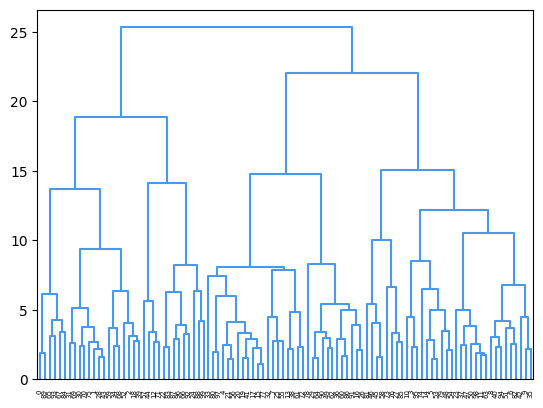

In [ ]:
dendro=linkage(ds2, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma2 = sch.dendrogram(dendro, color_threshold=float('inf'), link_color_func=color_func)

CONVERTIR DE DENDO A NEWICK

In [ ]:
tree = convertir_a_Tree(dendro,leaf_names=range(0,100))
#print(tree)

In [ ]:
asignar_nombres(tree)
subarboles2 = obtener_subarboles(tree)

#for i, subarbol in enumerate(subarboles2):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

In [ ]:
nsubarboles2 = obtener_n_subarboles(subarboles2,100)
#for n, subarboles in nsubarboles2:
 #   print(f"Subárboles con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

In [ ]:
nsubsmax = obtener_maximales(nsubarboles2)
# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in nsubsmax:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

In [ ]:
lista = calcular_sn(nsubsmax)

In [ ]:
Base2 = base_topologica(lista, nsubsmax)

Valor máximo en Sn: (4, 15407021574586368)
El valor de n es 4
Base topológica B₄: [['57', '44', '71', '12'], ['73', '76', '85', '27'], ['81', '46', '58', '45'], ['78'], ['24', '99', '88'], ['84', '67', '93', '65'], ['89', '0'], ['10', '95', '3'], ['72', '61', '38', '13'], ['32', '7', '55', '25'], ['33'], ['92', '66', '96', '87'], ['83', '22'], ['52', '2', '39', '18'], ['59', '68', '34'], ['69', '31'], ['42', '35', '9'], ['23'], ['74'], ['91', '26', '16'], ['36', '86', '60'], ['90', '62', '49'], ['64', '29'], ['97', '80'], ['75', '1', '43', '28'], ['70', '30'], ['51', '82', '6'], ['8', '94', '40'], ['50', '98', '63', '11'], ['47', '37'], ['79', '54', '48'], ['14', '53', '5'], ['4', '56', '21'], ['20'], ['17', '77', '15'], ['41', '19']]


### **Análisis Topológico 2**


In [ ]:
categorias_unicas2 = ds1['Quality'].unique()
print(categorias_unicas2)

['good' 'bad']


In [ ]:
buena = dsprueba[dsprueba['Quality']=='good']
#n = len(edades1)
buena.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
8,-0.815840,-0.301607,-0.001498,-0.384304,-1.081999,2.344492,-0.493978613,good
9,-1.071853,-1.496799,-0.303023,1.425078,2.183076,1.532804,1.433817427,good
10,-2.379440,-3.464898,4.115940,-0.302866,0.983021,1.931703,0.20355982,good
11,-0.646338,-1.895113,1.433269,2.941274,1.883618,0.988795,0.879334374,good
13,1.529403,1.294881,-1.834103,0.964646,-0.176118,1.585643,-0.064779143,good
14,0.427080,-3.100569,3.133362,0.503941,-0.561778,2.525790,-0.998086414,good
22,1.222651,-1.675180,0.919848,-1.906820,2.161397,-0.484258,4.077163435,good
23,-1.318353,-3.237418,2.997672,2.497223,3.050364,-0.659744,-2.054184632,good


In [ ]:
A2 = list(buena.index.astype(str))

In [ ]:
interior(Base2,A2,dsprueba)

Int(A) = ['81', '46', '58', '45', '24', '99', '88', '84', '67', '93', '65', '10', '95', '3', '72', '61', '38', '13', '83', '22', '23', '74', '70', '30', '50', '98', '63', '11', '47', '37']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
81,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997326959,good
46,-3.939221,-0.703665,3.132509,2.001038,3.255783,-1.506181,0.402124291,good
58,-3.245177,0.245042,1.786684,0.019288,2.748913,-0.404511,-1.73387327,good
45,-4.007359,-0.484425,2.723683,-0.280017,2.485075,-0.996606,-2.101646699,good
24,2.032738,-3.998190,-2.210895,-0.426174,6.017561,-0.004891,3.35747973,good
99,1.681663,-2.981674,-0.079805,-0.947866,3.034813,-0.708611,1.166970737,good
88,0.117483,-4.094027,0.224616,1.919510,1.486837,-2.313802,0.378997485,good
84,2.331019,-1.988981,-2.962670,2.994297,0.132375,0.488666,2.388586111,good
67,2.862215,-4.387424,-2.528902,1.397494,1.337644,1.186476,1.57326933,good
93,2.065478,-2.402224,-3.101409,3.617004,1.900639,-0.941696,-0.373300429,good


In [ ]:
exterior(Base2,A2,dsprueba)

Ext(A)= ['57', '44', '71', '12', '78', '32', '7', '55', '25', '33', '59', '68', '34', '91', '26', '16', '36', '86', '60', '64', '29', '97', '80', '4', '56', '21', '20', '17', '77', '15']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
57,-5.478006,-0.981874,4.637865,1.440098,0.901111,-2.403969,5.746699131,bad
44,-4.084910,-1.014714,3.033409,1.676498,-0.141705,-0.337045,2.131648699,bad
71,-2.564935,-1.541681,1.628079,0.830584,1.628192,-0.573445,4.072019984,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
78,-4.561322,2.126360,-3.325208,-1.062220,2.928190,4.126127,-0.609772001,bad
32,-1.536572,-2.783879,-0.825931,-0.346848,-3.713863,1.624957,-3.298101639,bad
7,-0.062355,-1.324635,-1.782417,-0.346283,-0.937752,0.863851,-2.835235275,bad
55,1.365953,-1.865935,-2.615157,0.704463,-2.727113,0.283812,-2.84060724,bad
25,0.099322,-2.018287,-1.592638,2.015768,-1.482077,0.863353,-1.710943166,bad
33,-1.333466,1.199732,0.653673,4.696968,-3.447247,0.897324,-2.35095113,bad


In [ ]:
adherencia(Base2,A2,dsprueba)

A'= ['73', '76', '85', '27', '81', '46', '58', '45', '24', '99', '88', '84', '67', '93', '65', '89', '0', '10', '95', '3', '72', '61', '38', '13', '92', '66', '96', '87', '83', '22', '52', '2', '39', '18', '69', '31', '42', '35', '9', '23', '74', '90', '62', '49', '75', '1', '43', '28', '70', '30', '51', '82', '6', '8', '94', '40', '50', '98', '63', '11', '47', '37', '79', '54', '48', '14', '53', '5', '41', '19']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
76,-1.498383,-0.877457,0.428514,-1.569405,0.033630,2.421253,-3.534016691,good
85,-1.920003,-1.921486,0.695242,0.390592,-0.765199,1.046547,-2.087742829,bad
27,-0.859351,-1.048091,0.618030,0.198749,1.493583,0.587974,-2.315433582,good
81,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997326959,good
...,...,...,...,...,...,...,...,...
14,0.427080,-3.100569,3.133362,0.503941,-0.561778,2.525790,-0.998086414,good
53,0.622759,-4.196353,0.847013,0.431259,-0.302134,3.726932,-1.188430018,bad
5,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044768947,bad
41,-0.936156,0.300120,-1.943791,1.196775,-1.966994,-0.662339,-0.651472669,good


In [ ]:
limite(Base2,A2,dsprueba)

A'= ['73', '76', '85', '27', '81', '46', '58', '45', '24', '99', '88', '84', '67', '93', '65', '89', '10', '95', '3', '72', '61', '38', '13', '92', '66', '96', '87', '83', '22', '52', '2', '18', '31', '42', '35', '9', '90', '49', '75', '1', '43', '28', '70', '30', '82', '6', '8', '94', '40', '50', '98', '63', '11', '47', '37', '79', '54', '48', '53', '5', '19']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
76,-1.498383,-0.877457,0.428514,-1.569405,0.033630,2.421253,-3.534016691,good
85,-1.920003,-1.921486,0.695242,0.390592,-0.765199,1.046547,-2.087742829,bad
27,-0.859351,-1.048091,0.618030,0.198749,1.493583,0.587974,-2.315433582,good
81,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997326959,good
...,...,...,...,...,...,...,...,...
54,1.152665,-1.647209,1.074099,1.518362,-1.023613,1.724863,-1.393716037,good
48,1.646001,-3.027518,0.250956,0.965901,-1.553908,2.084909,-0.474934654,bad
53,0.622759,-4.196353,0.847013,0.431259,-0.302134,3.726932,-1.188430018,bad
5,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044768947,bad


In [ ]:
frontera(Base2,A2,dsprueba)

Fr(['0', '3', '8', '9', '10', '11', '13', '14', '22', '23', '24', '27', '28', '30', '35', '37', '38', '39', '41', '43', '45', '46', '47', '50', '51', '54', '58', '61', '62', '63', '65', '66', '67', '69', '70', '72', '74', '75', '76', '79', '81', '83', '84', '87', '88', '93', '94', '95', '98', '99'])= ['73', '76', '85', '27', '89', '0', '92', '66', '96', '87', '52', '2', '39', '18', '69', '31', '42', '35', '9', '90', '62', '49', '75', '1', '43', '28', '51', '82', '6', '8', '94', '40', '79', '54', '48', '14', '53', '5', '41', '19']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
76,-1.498383,-0.877457,0.428514,-1.569405,0.033630,2.421253,-3.534016691,good
85,-1.920003,-1.921486,0.695242,0.390592,-0.765199,1.046547,-2.087742829,bad
27,-0.859351,-1.048091,0.618030,0.198749,1.493583,0.587974,-2.315433582,good
89,2.647636,-2.915323,-3.768891,0.956051,1.538986,2.483410,-0.990261265,bad
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
92,-2.017862,-0.505053,1.008962,-0.846894,2.391002,-2.678026,3.615340239,bad
66,0.683614,-0.625453,1.284087,0.770129,2.527534,-2.814110,2.954526914,good
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
87,-2.025549,-0.452053,-0.989745,1.052018,2.934817,-3.011730,1.389285206,good


Conjunto de calidad mala

In [ ]:
mala = dsprueba[dsprueba['Quality']=='bad']
#n = len(edades1)
mala.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
5,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044768947,bad
6,-2.160043,-0.505210,-1.273401,2.283968,0.429886,1.646340,1.663726188,bad
7,-0.062355,-1.324635,-1.782417,-0.346283,-0.937752,0.863851,-2.835235275,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
15,-0.489770,-1.033818,-1.848580,1.047947,-1.725705,1.257670,-0.402743578,bad
16,-1.722888,-1.183176,-1.890238,-1.060362,1.848864,5.201605,-1.12185085,bad
17,0.628772,-0.634391,-2.046147,1.270401,-2.293382,1.179185,0.405925967,bad


In [ ]:
B2 = list(mala.index.astype(str))

In [ ]:
interior(Base2,B2,dsprueba)

Int(A) = ['57', '44', '71', '12', '78', '32', '7', '55', '25', '33', '59', '68', '34', '91', '26', '16', '36', '86', '60', '64', '29', '97', '80', '4', '56', '21', '20', '17', '77', '15']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
57,-5.478006,-0.981874,4.637865,1.440098,0.901111,-2.403969,5.746699131,bad
44,-4.084910,-1.014714,3.033409,1.676498,-0.141705,-0.337045,2.131648699,bad
71,-2.564935,-1.541681,1.628079,0.830584,1.628192,-0.573445,4.072019984,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
78,-4.561322,2.126360,-3.325208,-1.062220,2.928190,4.126127,-0.609772001,bad
32,-1.536572,-2.783879,-0.825931,-0.346848,-3.713863,1.624957,-3.298101639,bad
7,-0.062355,-1.324635,-1.782417,-0.346283,-0.937752,0.863851,-2.835235275,bad
55,1.365953,-1.865935,-2.615157,0.704463,-2.727113,0.283812,-2.84060724,bad
25,0.099322,-2.018287,-1.592638,2.015768,-1.482077,0.863353,-1.710943166,bad
33,-1.333466,1.199732,0.653673,4.696968,-3.447247,0.897324,-2.35095113,bad


In [ ]:
exterior(Base2,B2,dsprueba)

Ext(A)= ['81', '46', '58', '45', '24', '99', '88', '84', '67', '93', '65', '10', '95', '3', '72', '61', '38', '13', '83', '22', '23', '74', '70', '30', '50', '98', '63', '11', '47', '37']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
81,-3.308437,1.569101,2.912393,-1.379048,0.897301,-1.421308,-3.997326959,good
46,-3.939221,-0.703665,3.132509,2.001038,3.255783,-1.506181,0.402124291,good
58,-3.245177,0.245042,1.786684,0.019288,2.748913,-0.404511,-1.73387327,good
45,-4.007359,-0.484425,2.723683,-0.280017,2.485075,-0.996606,-2.101646699,good
24,2.032738,-3.998190,-2.210895,-0.426174,6.017561,-0.004891,3.35747973,good
99,1.681663,-2.981674,-0.079805,-0.947866,3.034813,-0.708611,1.166970737,good
88,0.117483,-4.094027,0.224616,1.919510,1.486837,-2.313802,0.378997485,good
84,2.331019,-1.988981,-2.962670,2.994297,0.132375,0.488666,2.388586111,good
67,2.862215,-4.387424,-2.528902,1.397494,1.337644,1.186476,1.57326933,good
93,2.065478,-2.402224,-3.101409,3.617004,1.900639,-0.941696,-0.373300429,good


In [ ]:
adherencia(Base2,B2,dsprueba)

A'= ['57', '44', '71', '12', '73', '76', '85', '27', '78', '89', '0', '32', '7', '55', '25', '33', '92', '66', '96', '87', '52', '2', '39', '18', '59', '68', '34', '69', '31', '42', '35', '9', '91', '26', '16', '36', '86', '60', '90', '62', '49', '64', '29', '97', '80', '75', '1', '43', '28', '51', '82', '6', '8', '94', '40', '79', '54', '48', '14', '53', '5', '4', '56', '21', '20', '17', '77', '15', '41', '19']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
57,-5.478006,-0.981874,4.637865,1.440098,0.901111,-2.403969,5.746699131,bad
44,-4.084910,-1.014714,3.033409,1.676498,-0.141705,-0.337045,2.131648699,bad
71,-2.564935,-1.541681,1.628079,0.830584,1.628192,-0.573445,4.072019984,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
...,...,...,...,...,...,...,...,...
17,0.628772,-0.634391,-2.046147,1.270401,-2.293382,1.179185,0.405925967,bad
77,-1.321339,-0.649023,-1.700495,1.297451,-1.293396,1.485722,-0.476339027,bad
15,-0.489770,-1.033818,-1.848580,1.047947,-1.725705,1.257670,-0.402743578,bad
41,-0.936156,0.300120,-1.943791,1.196775,-1.966994,-0.662339,-0.651472669,good


In [ ]:
limite(Base2,B2,dsprueba)

A'= ['57', '44', '71', '12', '73', '76', '85', '27', '0', '32', '7', '55', '25', '92', '66', '96', '87', '52', '2', '39', '18', '59', '68', '34', '69', '35', '9', '91', '26', '16', '36', '86', '60', '90', '62', '49', '64', '29', '97', '80', '75', '43', '28', '51', '82', '6', '8', '94', '79', '54', '14', '53', '5', '4', '56', '21', '17', '77', '15', '41']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
57,-5.478006,-0.981874,4.637865,1.440098,0.901111,-2.403969,5.746699131,bad
44,-4.084910,-1.014714,3.033409,1.676498,-0.141705,-0.337045,2.131648699,bad
71,-2.564935,-1.541681,1.628079,0.830584,1.628192,-0.573445,4.072019984,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
76,-1.498383,-0.877457,0.428514,-1.569405,0.033630,2.421253,-3.534016691,good
85,-1.920003,-1.921486,0.695242,0.390592,-0.765199,1.046547,-2.087742829,bad
27,-0.859351,-1.048091,0.618030,0.198749,1.493583,0.587974,-2.315433582,good
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
32,-1.536572,-2.783879,-0.825931,-0.346848,-3.713863,1.624957,-3.298101639,bad


In [ ]:
frontera(Base2,B2,dsprueba)

Fr(['1', '2', '4', '5', '6', '7', '12', '15', '16', '17', '18', '19', '20', '21', '25', '26', '29', '31', '32', '33', '34', '36', '40', '42', '44', '48', '49', '52', '53', '55', '56', '57', '59', '60', '64', '68', '71', '73', '77', '78', '80', '82', '85', '86', '89', '90', '91', '92', '96', '97'])= ['73', '76', '85', '27', '89', '0', '92', '66', '96', '87', '52', '2', '39', '18', '69', '31', '42', '35', '9', '90', '62', '49', '75', '1', '43', '28', '51', '82', '6', '8', '94', '40', '79', '54', '48', '14', '53', '5', '41', '19']


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
73,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
76,-1.498383,-0.877457,0.428514,-1.569405,0.033630,2.421253,-3.534016691,good
85,-1.920003,-1.921486,0.695242,0.390592,-0.765199,1.046547,-2.087742829,bad
27,-0.859351,-1.048091,0.618030,0.198749,1.493583,0.587974,-2.315433582,good
89,2.647636,-2.915323,-3.768891,0.956051,1.538986,2.483410,-0.990261265,bad
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
92,-2.017862,-0.505053,1.008962,-0.846894,2.391002,-2.678026,3.615340239,bad
66,0.683614,-0.625453,1.284087,0.770129,2.527534,-2.814110,2.954526914,good
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
87,-2.025549,-0.452053,-0.989745,1.052018,2.934817,-3.011730,1.389285206,good
